In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import os
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
ds_path = '/content/drive/MyDrive/Self supervised/full_data'
data_dir = pathlib.Path(ds_path)
print(data_dir)

img_count = len(list(data_dir.glob('*/*.jpg')))
print(type(data_dir.glob('*/*.jpg')))
print(img_count)

/content/drive/MyDrive/Self supervised/full_data
<class 'generator'>
3438


In [ ]:
img_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                       validation_split = 0.01,
                                                       subset = 'training',
                                                       seed = 123,
                                                       batch_size = 3404,
                                                       image_size = (img_size, img_size)
                                                       )

# train_ds = tf.data.Dataset.from_tensor_slices(train_ds).shuffle(100).batch(16, drop_remainder=True)

print( train_ds, type(train_ds))
classes = train_ds.class_names
print(classes)
# tr_np = np.stack(list(train_ds))

Found 3444 files belonging to 3 classes.
Using 3410 files for training.
<BatchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)> <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
['Apple', 'Banana', 'Orange']


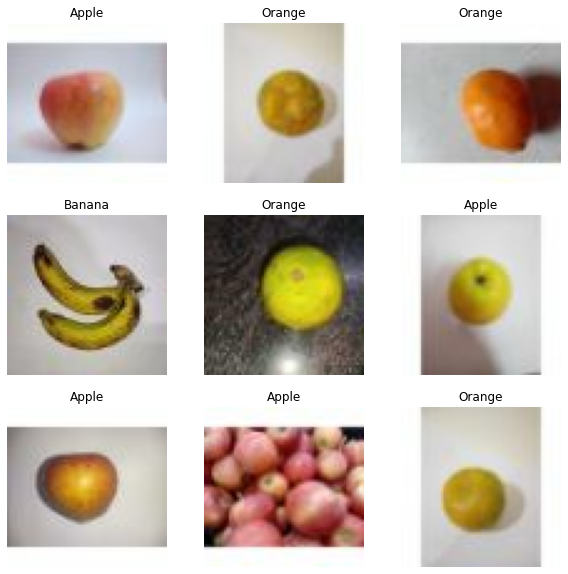

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans

total_clusters = 3

print(total_clusters)

3


In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    image_batch = image_batch.astype('float32')
    image_batch = image_batch/255.0
    print(image_batch.min())
    print(image_batch.max())
    Xt = image_batch.reshape(len(image_batch), -1)
    print(Xt.shape)
    print(labels_batch)

    kmeans = MiniBatchKMeans(n_clusters = total_clusters)

    kmeans.fit(Xt)
    x_train = image_batch
    y_train = labels_batch
    break

(3404, 64, 64, 3)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
(3404, 12288)
tf.Tensor([2 1 0 ... 0 2 0], shape=(3404,), dtype=int32)


In [ ]:
kmeans.labels_
print(len(kmeans.labels_))
print(len(np.unique(kmeans.labels_)))

3404
3


In [ ]:
# def retrieve_info(cluster_labels, y_train):
#     reference_labels = {}
#     for i in range(len(np.unique(kmeans.labels_))):
#         index = np.where(cluster_labels == i, 1, 0)
#         num = np.bincount(y_train[index == 1]).argmax()

#     # print(reference_labels)
#     return reference_labels

def retrieve_info(cluster_labels,y_train):
    '''
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    '''
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    
    print(reference_labels)
    return reference_labels

In [ ]:
for i in kmeans.labels_:
    print(i, end=" ")

0 2 0 2 1 0 0 0 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 2 2 0 2 2 2 2 0 2 0 0 0 0 2 0 2 2 1 1 0 1 0 2 0 2 0 0 2 0 1 2 0 0 0 1 2 0 1 0 1 0 0 2 0 2 2 0 2 2 0 2 2 2 0 2 2 0 2 0 0 2 2 2 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 2 0 2 1 2 0 0 0 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 0 0 0 2 0 1 2 1 2 0 0 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 0 2 0 2 2 0 0 0 2 2 2 2 0 2 1 0 0 2 2 1 1 2 0 0 2 0 2 0 0 0 2 2 2 2 0 0 2 2 0 0 2 0 2 0 0 2 0 0 2 2 2 1 0 2 0 2 2 1 2 2 0 1 2 0 2 0 2 2 0 2 0 2 0 0 0 0 2 2 0 0 0 2 2 1 2 2 0 0 0 2 1 2 0 2 0 0 2 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 2 2 0 0 2 0 2 0 0 0 2 0 2 2 0 2 0 2 0 2 0 0 0 1 2 2 0 0 0 0 2 1 2 2 0 0 2 0 0 0 2 0 2 2 2 2 2 1 0 0 2 0 2 0 2 0 2 0 2 0 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 2 0 2 0 2 0 0 0 0 2 2 0 2 0 0 0 0 1 0 0 0 0 0 1 0 2 2 2 0 0 0 2 0 2 0 2 2 0 0 2 2 0 0 2 0 0 2 0 2 2 2 2 2 0 0 0 2 0 2 2 0 0 2 2 0 0 0 2 2 0 0 2 2 0 2 2 1 2 2 2 0 0 0 2 2 0 0 2 0 0 0 2 2 2 0 2 0 1 0 2 0 0 0 2 2 0 2 0 0 0 0 0 2 0 2 0 2 1 1 2 0 0 1 

In [ ]:
reference_labels = retrieve_info(kmeans.labels_, y_train)
number_labels = np.random.rand(len(kmeans.labels_))
print(type(number_labels))
print(type(kmeans.labels_))
print(type(reference_labels))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

{0: 0, 1: 0, 2: 0}
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'dict'>


In [ ]:
print(number_labels[:20].astype('int'))
print(y_train[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
tf.Tensor([2 1 0 2 0 0 2 0 1 0 2 1 0 0 0 1 2 1 2 2], shape=(20,), dtype=int32)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.4764982373678026


In [ ]:
def calculate_metrics(model,output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [ ]:
from sklearn import metrics

cluster_number = [4,6,9,10,15,20,50,100]
for i in cluster_number:
    total_clusters = 3
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)
    # Fitting the model to training set
    kmeans.fit(Xt)
    # Calculating the metrics
 
    calculate_metrics(kmeans,y_train)
    # Calculating reference_labels
    reference_labels = retrieve_info(kmeans.labels_,y_train)
    # ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))

    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
    
    print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
    print('\n')

Number of clusters is 4
Inertia : 1035420.51013975
Homogeneity :       0.03866006199495202
{0: 0, 1: 0, 2: 0, 3: 0}
Accuracy score : 0.4764982373678026


Number of clusters is 6
Inertia : 852557.4087555902
Homogeneity :       0.05902886492784553
{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1}
Accuracy score : 0.481786133960047


Number of clusters is 9
Inertia : 747919.8854520733
Homogeneity :       0.09033948935179845
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 0, 8: 0}
Accuracy score : 0.5096944770857814


Number of clusters is 10
Inertia : 731293.2352493108
Homogeneity :       0.08510052843573374
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}
Accuracy score : 0.5073443008225617


Number of clusters is 15
Inertia : 664617.6335584656
Homogeneity :       0.17993853093043294
{0: 2, 1: 0, 2: 2, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 1, 10: 0, 11: 0, 12: 2, 13: 1, 14: 0}
Accuracy score : 0.5837250293772033


Number of clusters is 20
Inertia : 624504.1471537893
Homogeneity :       0.2

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids.shape)
centroids = centroids.reshape(100,64,64,3)
print(centroids.shape)

(100, 12288)
(100, 64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

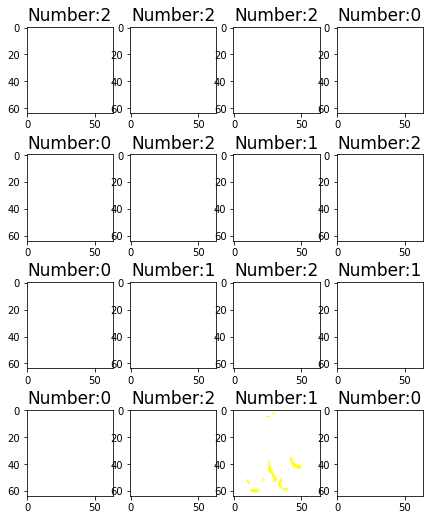

In [ ]:
centroids = centroids * 255

plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
    plt.imshow(centroids[i])